# Glottolog families and Laplacian spectrum

## Languages of the americas

In [9]:
import pandas as pd 

In [10]:
## https://www.ethnologue.com/codes/download-code-tables

languages_americas = pd.read_csv('CountryCodes.tab',sep='\t')

In [11]:
country_americas = languages_americas[languages_americas.Area == 'Americas']

In [12]:
country_americas_ID = list(country_americas.CountryID)

In [13]:
## https://www.ethnologue.com/codes/download-code-tables

languages_codes = pd.read_csv('LanguageCodes.tab',sep='\t')

In [14]:
languages_codes = languages_codes[languages_codes.CountryID.isin(country_americas_ID)]

In [15]:
## iso codes for languages of the americas
languages_codes

,LangID,CountryID,LangStatus,Name
11,aan,BR,L,Anambé
13,aap,BR,L,"Arára, Pará"
14,aaq,US,L,"Abenaki, Eastern"
26,abe,CA,L,"Abenaki, Western"
48,aca,CO,L,Achagua
52,acf,LC,L,Saint Lucian Creole French
61,acr,GT,L,Achi
62,acs,BR,X,Acroá
64,acu,EC,L,Achuar-Shiwiar
65,acv,US,L,Achumawi


In [16]:
languages_codes_ID = list(languages_codes.LangID)

In [18]:
## corpus UDHR https://www.unicode.org/udhr/index.html

languages={}

for language in languages_codes_ID:
    #with open('udhr_' + language + '.txt', 'r', encoding='utf-8') as file:
    try: 
        file = open('udhr/'+'udhr_'+language+'.txt', 'r')  
        language_text=file.read().split('\n')
        languages[language]=[line.strip() for line in language_text]
        languages[language]=[line for line in languages[language] if len(line)>0]
    except FileNotFoundError:
        pass

In [20]:
## mapudungun :)

languages['arn'][:10]

['Universal Declaration of Human Rights - Mapudungun',
 '© 1996 – 2009 The Office of the High Commissioner for Human Rights',
 'This plain text version prepared by the “UDHR in Unicode”',
 'project, https://www.unicode.org/udhr.',
 '---',
 'Kom Mapu Fijke Az Tañi Az Mogeleam',
 'Tuwvlzugun',
 '("Preámbulo" pi ta wigka)',
 'Kimnieel fij mapu mew tañi kimgen kvme felen kisugvnew felen xvr kvme mvlen. Tvfaci zugu ñi mvleken mvleyem yamvwvn ka xvr kvme nor felen kom pu reñmawke ce mew.',
 'Gewenonmu yamuwvn, zuamgewenonmu kvme felen, goymagenmu nor felen mvley re jazkvnkawvn: Fey mew mvley xvrvmzugu kom pu ce tañi kvme mogeleam kisuke ñi feyentun mew, kisu ñi rakizuam mew ka ñi wimtun mew ñi mvleal egvn.']

In [71]:
## classification by macroarea :)
## https://glottolog.org/meta/downloads

macroarea = pd.read_csv('languages_and_dialects_geo.csv',sep=',')

In [72]:
macroarea.dropna(inplace = True)

In [73]:
macroarea = macroarea[['isocodes','macroarea']]

In [74]:
## dictionary iso_code:macroarea

macroarea = dict(zip(macroarea['isocodes'], macroarea['macroarea']))

In [75]:
## filter by languages of the americas

macroarea = {language:macroarea[language] for language in languages.keys()}

In [76]:
macroarea

{'acu': 'South America',
 'agr': 'South America',
 'amc': 'South America',
 'ame': 'South America',
 'amr': 'South America',
 'arl': 'South America',
 'arn': 'South America',
 'auc': 'South America',
 'ayr': 'South America',
 'boa': 'South America',
 'cab': 'North America',
 'cak': 'North America',
 'cbi': 'South America',
 'cbr': 'South America',
 'cbs': 'South America',
 'cbt': 'South America',
 'cbu': 'South America',
 'chj': 'North America',
 'cic': 'North America',
 'cni': 'South America',
 'cof': 'South America',
 'cot': 'South America',
 'cpu': 'South America',
 'csa': 'North America',
 'csw': 'North America',
 'ese': 'South America',
 'guc': 'South America',
 'gug': 'South America',
 'guu': 'South America',
 'gyr': 'South America',
 'haw': 'Papunesia',
 'hns': 'South America',
 'hus': 'North America',
 'huu': 'South America',
 'ike': 'North America',
 'jiv': 'South America',
 'kal': 'North America',
 'kek': 'North America',
 'kwi': 'South America',
 'mam': 'North America',
 'ma

## Laplacian vs classifications with different zoom!

In [77]:
def tokenize(s):
    return s.split(' ')

In [78]:
def clean(L):
    language=languages[L]
    table = str.maketrans({key: None for key in '``!"#$%&\¿()*+,-./:;<=>?@[\\]_{|}'})
    language=[list(filter(None, [w.lower().translate(table) for w in tokenize(sentence)])) for sentence in language if len([w.lower() for w in [w.translate(table) for w in tokenize(sentence)]])>0]
    language=[[w for w in s if w!="''"] for s in language] 
    language=[[w for w in s if w!='̃'] for s in language] 
    language=[[w for w in s if not w.isdigit()] for s in language]
    if L=='zro':
        return language[6:]
    elif L=='tca':
        return language[7:]
    elif L=='gyr':
        return language[9:]
    else:
        return language[5:]

In [79]:
clean_languages={}
for language in languages:
    clean_languages[language]=clean(language)

In [80]:
for language in clean_languages.keys():
    print(language, clean_languages[language][0])

acu ['kintati', 'diciembre', 'nantuti', 'musachtin', 'apu', 'ainau', 'iruntrar', 'tu', 'aarmi', 'tusar', 'nunia', 'aarar', 'mash', 'nungkanam', 'pujuinau', 'angkan', 'pengker', 'pujusarti', 'tusar', 'aararmiayi']
agr ['ashi', 'aents', 'yakat', 'muun', 'aidaunmaya', 'ijunjamunum', 'tsawan', 'de', 'diciembre', 'tin', 'etsejau', 'ainawai', 'juju', 'ashi', 'aents', 'aidaunum', 'uminkatin', 'ati', 'tusa', 'nunu', 'tsawantai', 'jintiajajui', 'chichaman', 'dutika', 'ashi', 'nugkanum', 'iwainaju', 'ainawai', 'aents', 'nii', 'anentaibau', 'nii', 'wakejamu', 'yupichu', 'dutikashmin', 'chichajamunum', 'ayamkagtaun', 'tuja', 'tiaju', 'ainawai', 'juju', 'chicham', 'pegkeg', 'jintiagmawa', 'juka', 'juwig', 'nagkankashti', 'ashi', 'nugkanum', 'dapampaejati', 'yakat', 'muun', 'aidaunum', 'yakat', 'piipich', 'aidaunmashkam', 'papi', 'aujtainmash', 'ashi', 'tutinjati', 'tiajui', 'tuja', 'papinum', 'agajag', 'sujuktinme', 'tiajui', 'ashi', 'aents', 'aidau', 'aujus', 'dekatnume', 'tusa', 'makichkish', 'ug

### simple statistics: types, tokens and entropy

In [81]:
from collections import Counter

In [82]:
words_entropy={}
words={}
mean_tokens={}
mean_types={}
for language in clean_languages.keys():
    words_entropy[language]=[item for sublist in clean_languages[language] for item in sublist]
    words[language]=[len([item for sublist in clean_languages[language] for item in sublist]),len(set([item for sublist in clean_languages[language] for item in sublist])),Counter([item for sublist in clean_languages[language] for item in sublist])]
    mean_tokens[language]=len([item for sublist in clean_languages[language] for item in sublist])
    mean_types[language]=len(set([item for sublist in clean_languages[language] for item in sublist]))
    print(language,len(clean_languages[language]),len([item for sublist in clean_languages[language] for item in sublist]),len(set([item for sublist in clean_languages[language] for item in sublist])))

acu 92 1676 559
agr 90 1811 827
amc 87 1496 672
ame 94 2398 719
amr 93 1407 421
arl 94 1973 530
arn 91 1712 390
auc 203 1454 376
ayr 91 925 610
boa 96 1567 704
cab 94 1330 476
cak 90 2514 454
cbi 100 3120 959
cbr 92 2204 542
cbs 76 626 258
cbt 92 1122 483
cbu 91 1290 574
chj 91 1683 423
cic 93 554 301
cni 92 1305 515
cof 95 1228 424
cot 94 1532 715
cpu 92 2352 862
csa 96 1699 425
csw 70 1400 499
ese 68 763 529
guc 93 1259 489
gug 83 1154 576
guu 90 2071 391
gyr 78 1159 459
haw 91 2429 316
hns 94 2221 490
hus 94 1554 335
huu 91 1294 385
ike 70 857 620
jiv 94 1564 705
kal 91 1039 682
kek 91 1520 407
kwi 202 1294 733
mam 91 1527 440
maz 91 1544 310
mcd 93 906 458
mcf 95 2373 600
mic 91 1330 573
miq 85 1634 394
mto 82 1229 450
mxv 94 1336 396
mzi 99 1250 570
nav 91 1601 779
nhn 92 2357 601
not 91 1100 383
ojb 93 1126 587
ote 91 1819 317
pap 90 1878 480
pbb 90 1467 700
ppl 91 1856 354
prq 75 626 258
quc 90 2171 501
qud 91 933 456
qug 239 1409 702
quy 93 1279 645
quz 94 1128 664
qva 92 1715 

In [83]:
distributions={}
for language in clean_languages.keys():
    distributions[language]=list(dict(Counter(words_entropy[language])).values())

In [84]:
from scipy.stats import entropy

entropy_languages={}
for language in clean_languages.keys():
    entropy_languages[language]=entropy(distributions[language],base=2)

In [85]:
entropy_languages

{'acu': 7.781735299462781,
 'agr': 8.624576837219514,
 'amc': 8.1228236057041,
 'ame': 7.922767536203706,
 'amr': 7.4413544952158786,
 'arl': 7.374963428505882,
 'arn': 6.9113730914451805,
 'auc': 7.264660169582391,
 'ayr': 8.690342890603759,
 'boa': 8.49357105441115,
 'cab': 7.677975984418387,
 'cak': 6.921739911388781,
 'cbi': 8.337070416207856,
 'cbr': 7.4427786893126955,
 'cbs': 7.133591345434413,
 'cbt': 7.782848452619174,
 'cbu': 8.263351856784869,
 'chj': 7.045566317194388,
 'cic': 7.553227639728278,
 'cni': 7.659922330373956,
 'cof': 7.759548101352718,
 'cot': 8.362513229253956,
 'cpu': 8.447238582229218,
 'csa': 7.1709309397987315,
 'csw': 7.245927689143945,
 'ese': 8.640004697990811,
 'guc': 7.717788922222719,
 'gug': 8.179772242580652,
 'guu': 6.220993254937583,
 'gyr': 7.74197924861368,
 'haw': 6.392805811675278,
 'hns': 6.965345975086797,
 'hus': 6.686094613876792,
 'huu': 7.430576915207978,
 'ike': 8.59297850744712,
 'jiv': 8.468053530939043,
 'kal': 8.797911796156606,
 '

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

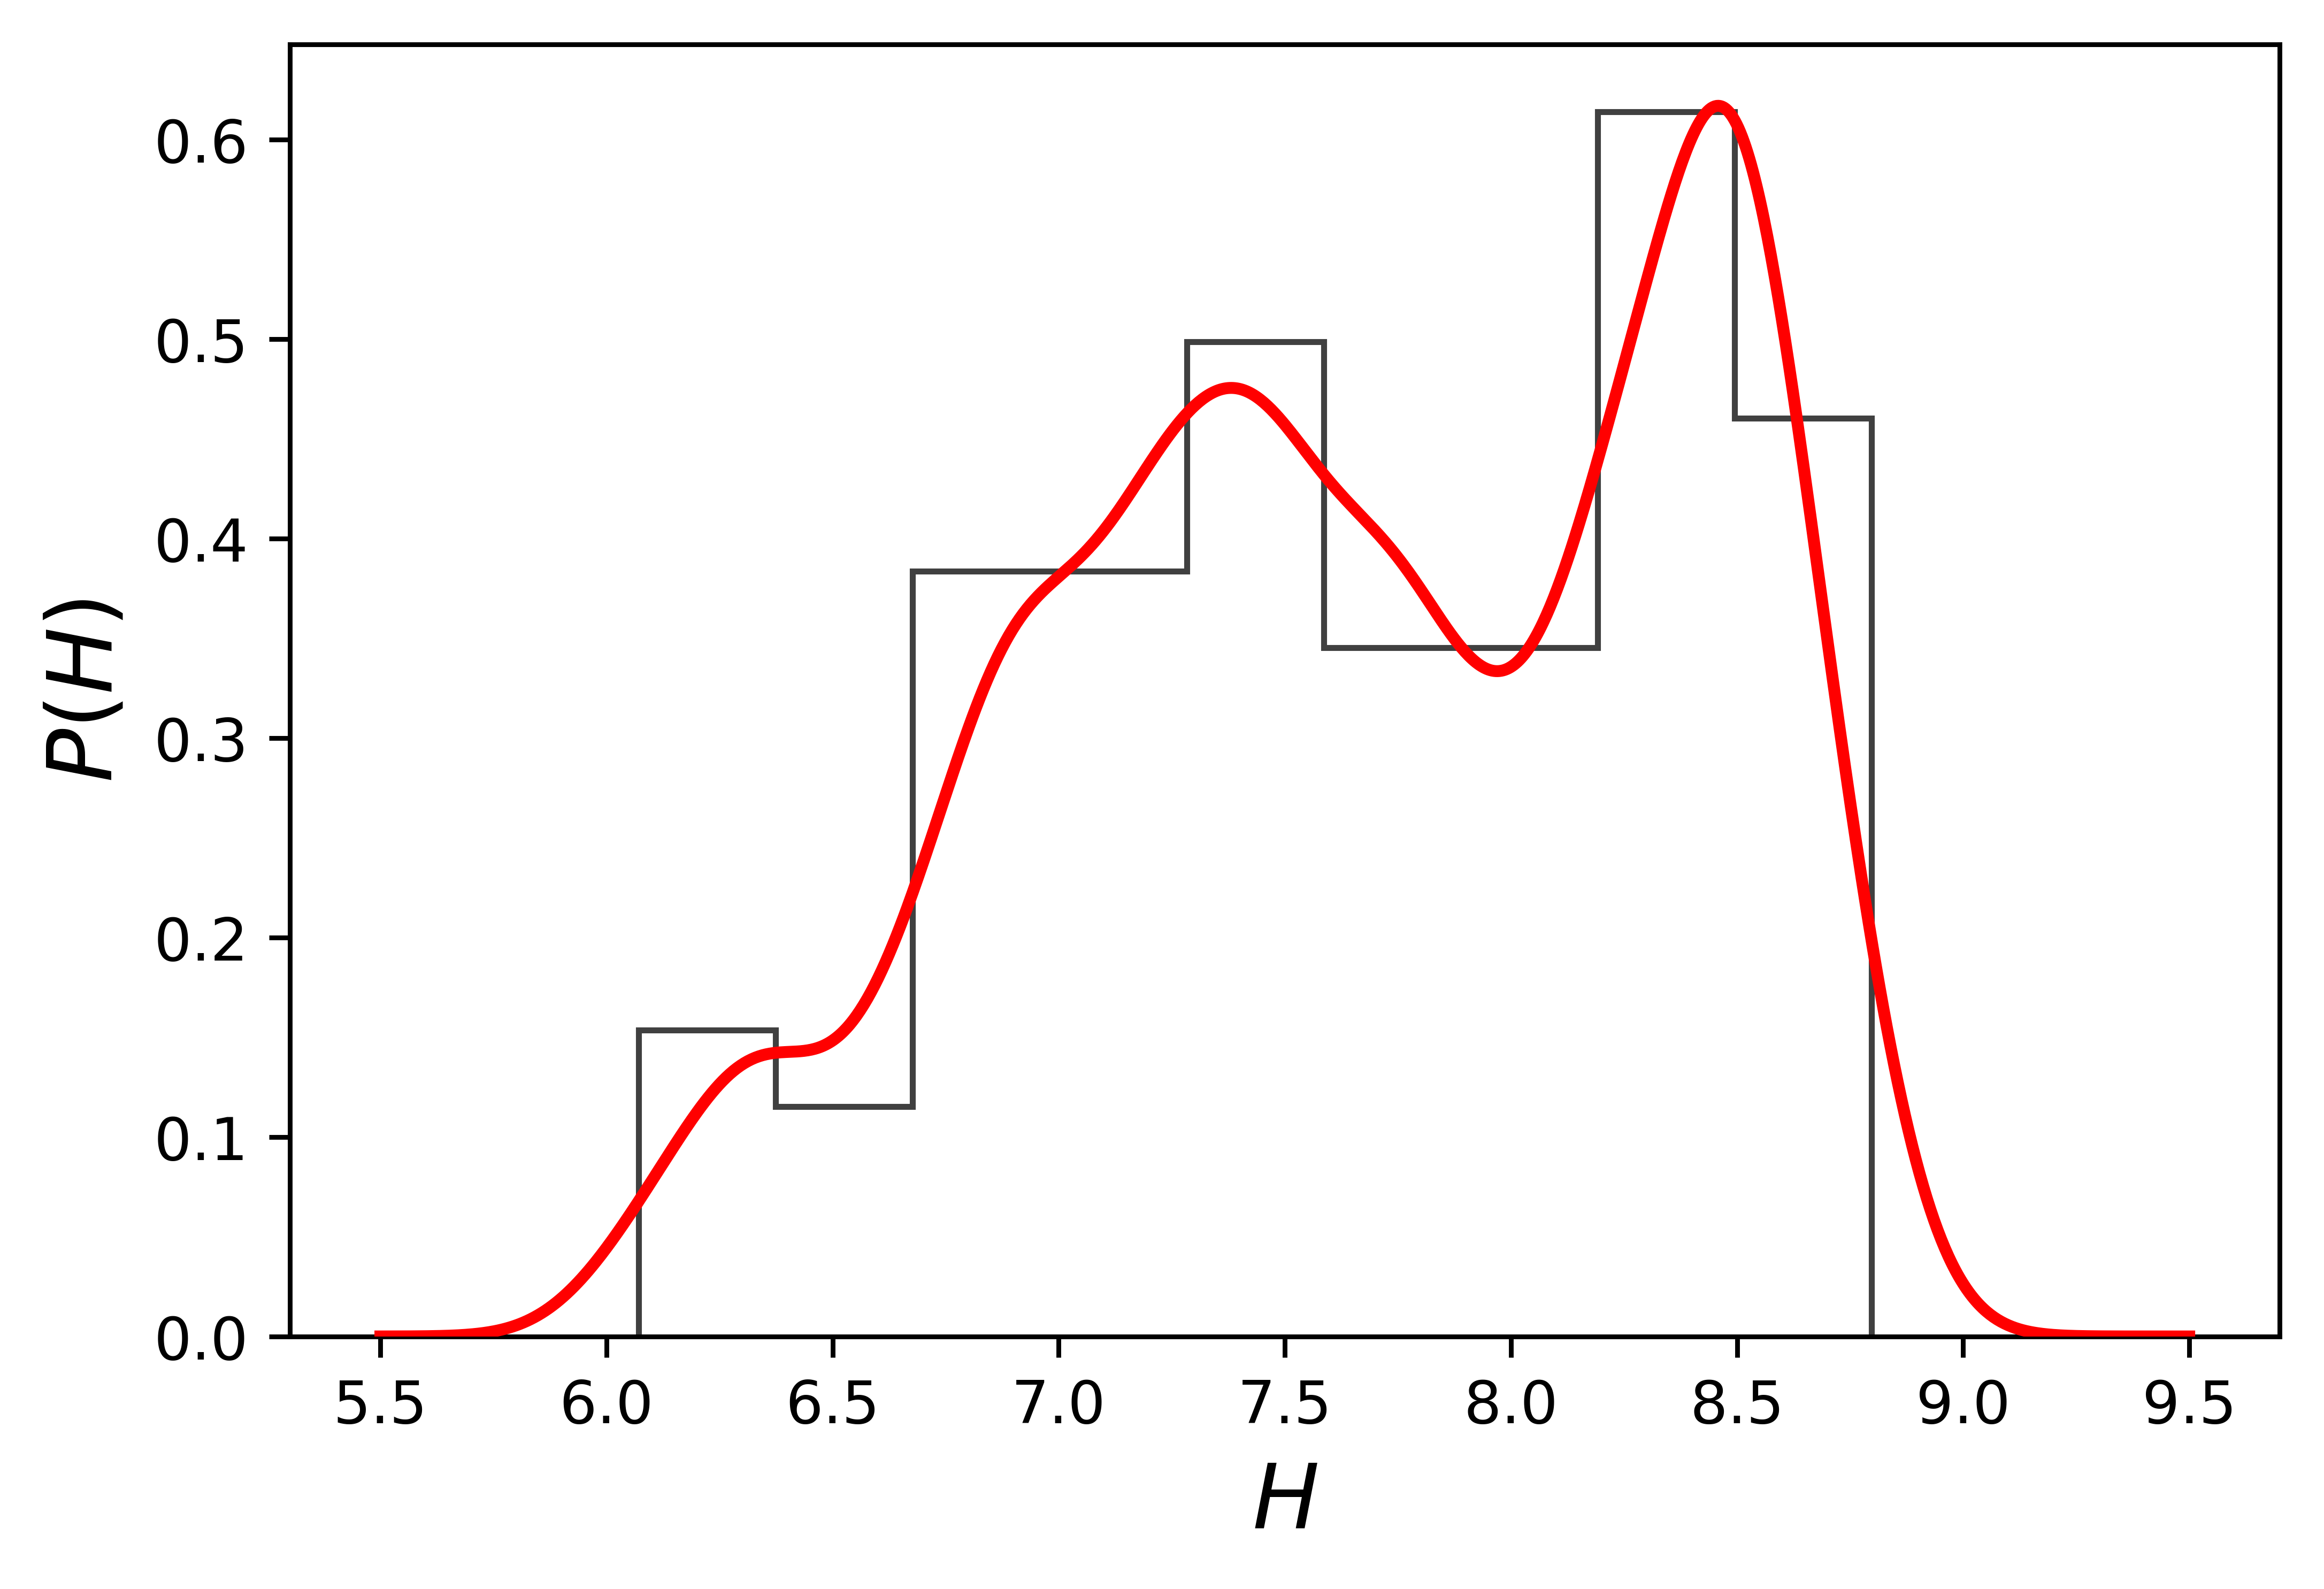

In [87]:
fig, ax = plt.subplots(dpi=800)

H=list(entropy_languages.values())
data = np.array(H)
plt.hist(data, bins='doane', cumulative=False, alpha=0.75,histtype='step',stacked=False,density=True,
        zorder=5, edgecolor='k')
kde = sm.nonparametric.KDEUnivariate(data)
kde.fit(bw=0.14) # Estimate the densities
X=np.linspace(5.5, 9.5, num=1000)

ax.plot(X, [kde.evaluate(x) for x in X], '-', lw=2, color='r', zorder=10)

#plt.legend(loc='upper left',fontsize=12)
#plt.xlim([0., 2])
#plt.ylim([0., 3])
plt.xlabel(r'$H$',fontsize=15)
plt.ylabel(r'$P(H)$',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('entropy.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [90]:
## entropy by macroarea

entropy_macroarea = {key:[] for key in ['South America','North America']}

In [91]:
entropy_macroarea

{'South America': [], 'North America': []}

In [104]:
for language in entropy_languages.keys():
    if macroarea[language]=='South America':
        entropy_macroarea['South America']+=[entropy_languages[language]]
    else:
        entropy_macroarea['North America']+=[entropy_languages[language]]

In [105]:
{key:[np.mean(entropy_macroarea[key]),np.std(entropy_macroarea[key])] for key in entropy_macroarea.keys()}

{'South America': [7.843090747875952, 0.8982344668230502],
 'North America': [7.1889685108834875, 0.972795982607467]}

In [106]:
from scipy import stats

In [107]:
## we reject the null hypothesis of equal averages

stats.ttest_ind(entropy_macroarea['South America'],entropy_macroarea['North America'])

Ttest_indResult(statistic=4.482175885398868, pvalue=1.3360996590013305e-05)

## graphs and Laplacian spectrum :)

### graphs :)

In [108]:
import networkx as nx

In [110]:
## adjacency graph

def GoW(text_clean,radius=1):
    G=nx.Graph()
    for sentence in text_clean:
        if len(sentence)>1:
            pairs=[]
            for r in list(range(1,radius+1)):
                pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                #else:
                #    x=G[pair[0]][pair[1]]['weight']
                #    G[pair[0]][pair[1]]['weight']=x+1
    
    return G

In [115]:
## erdos renyi model

def GoW_random(text_clean):
    G=GoW(text_clean)
    degree=list(dict(G.degree()).values())
    n=len(G)
    p=np.mean(degree)/float(n)
    G=nx.erdos_renyi_graph(n,p)
    
    return G

In [113]:
graphs={}
for language in languages.keys():
    #print(language)
    G=GoW(clean_languages[language])
    graphs[language]=G

In [116]:
graphs_random={}
for language in languages.keys():
    #print(language)
    G=GoW_random(clean_languages[language])
    graphs_random[language]=G

In [117]:
from numpy import linalg as LA
import numpy as np

In [118]:
## normalized Laplacian spectrum

def spectrum(G):
    M=nx.normalized_laplacian_matrix(G).todense()
    eigs=LA.eigvals(M)
    return eigs

In [119]:
spectrum_languages={}

for language in graphs.keys():
    #print(language)
    G=graphs[language]
    spectrum_languages[language]=sorted([np.real(n) for n in spectrum(G)])

In [120]:
spectrum_languages_random={}

for language in graphs_random.keys():
    #print(language)
    G=graphs_random[language]
    spectrum_languages_random[language]=sorted([np.real(n) for n in spectrum(G)])

In [126]:
colors = {key:'r' if macroarea[key]=='South America' else 'b' for key in spectrum_languages.keys()}

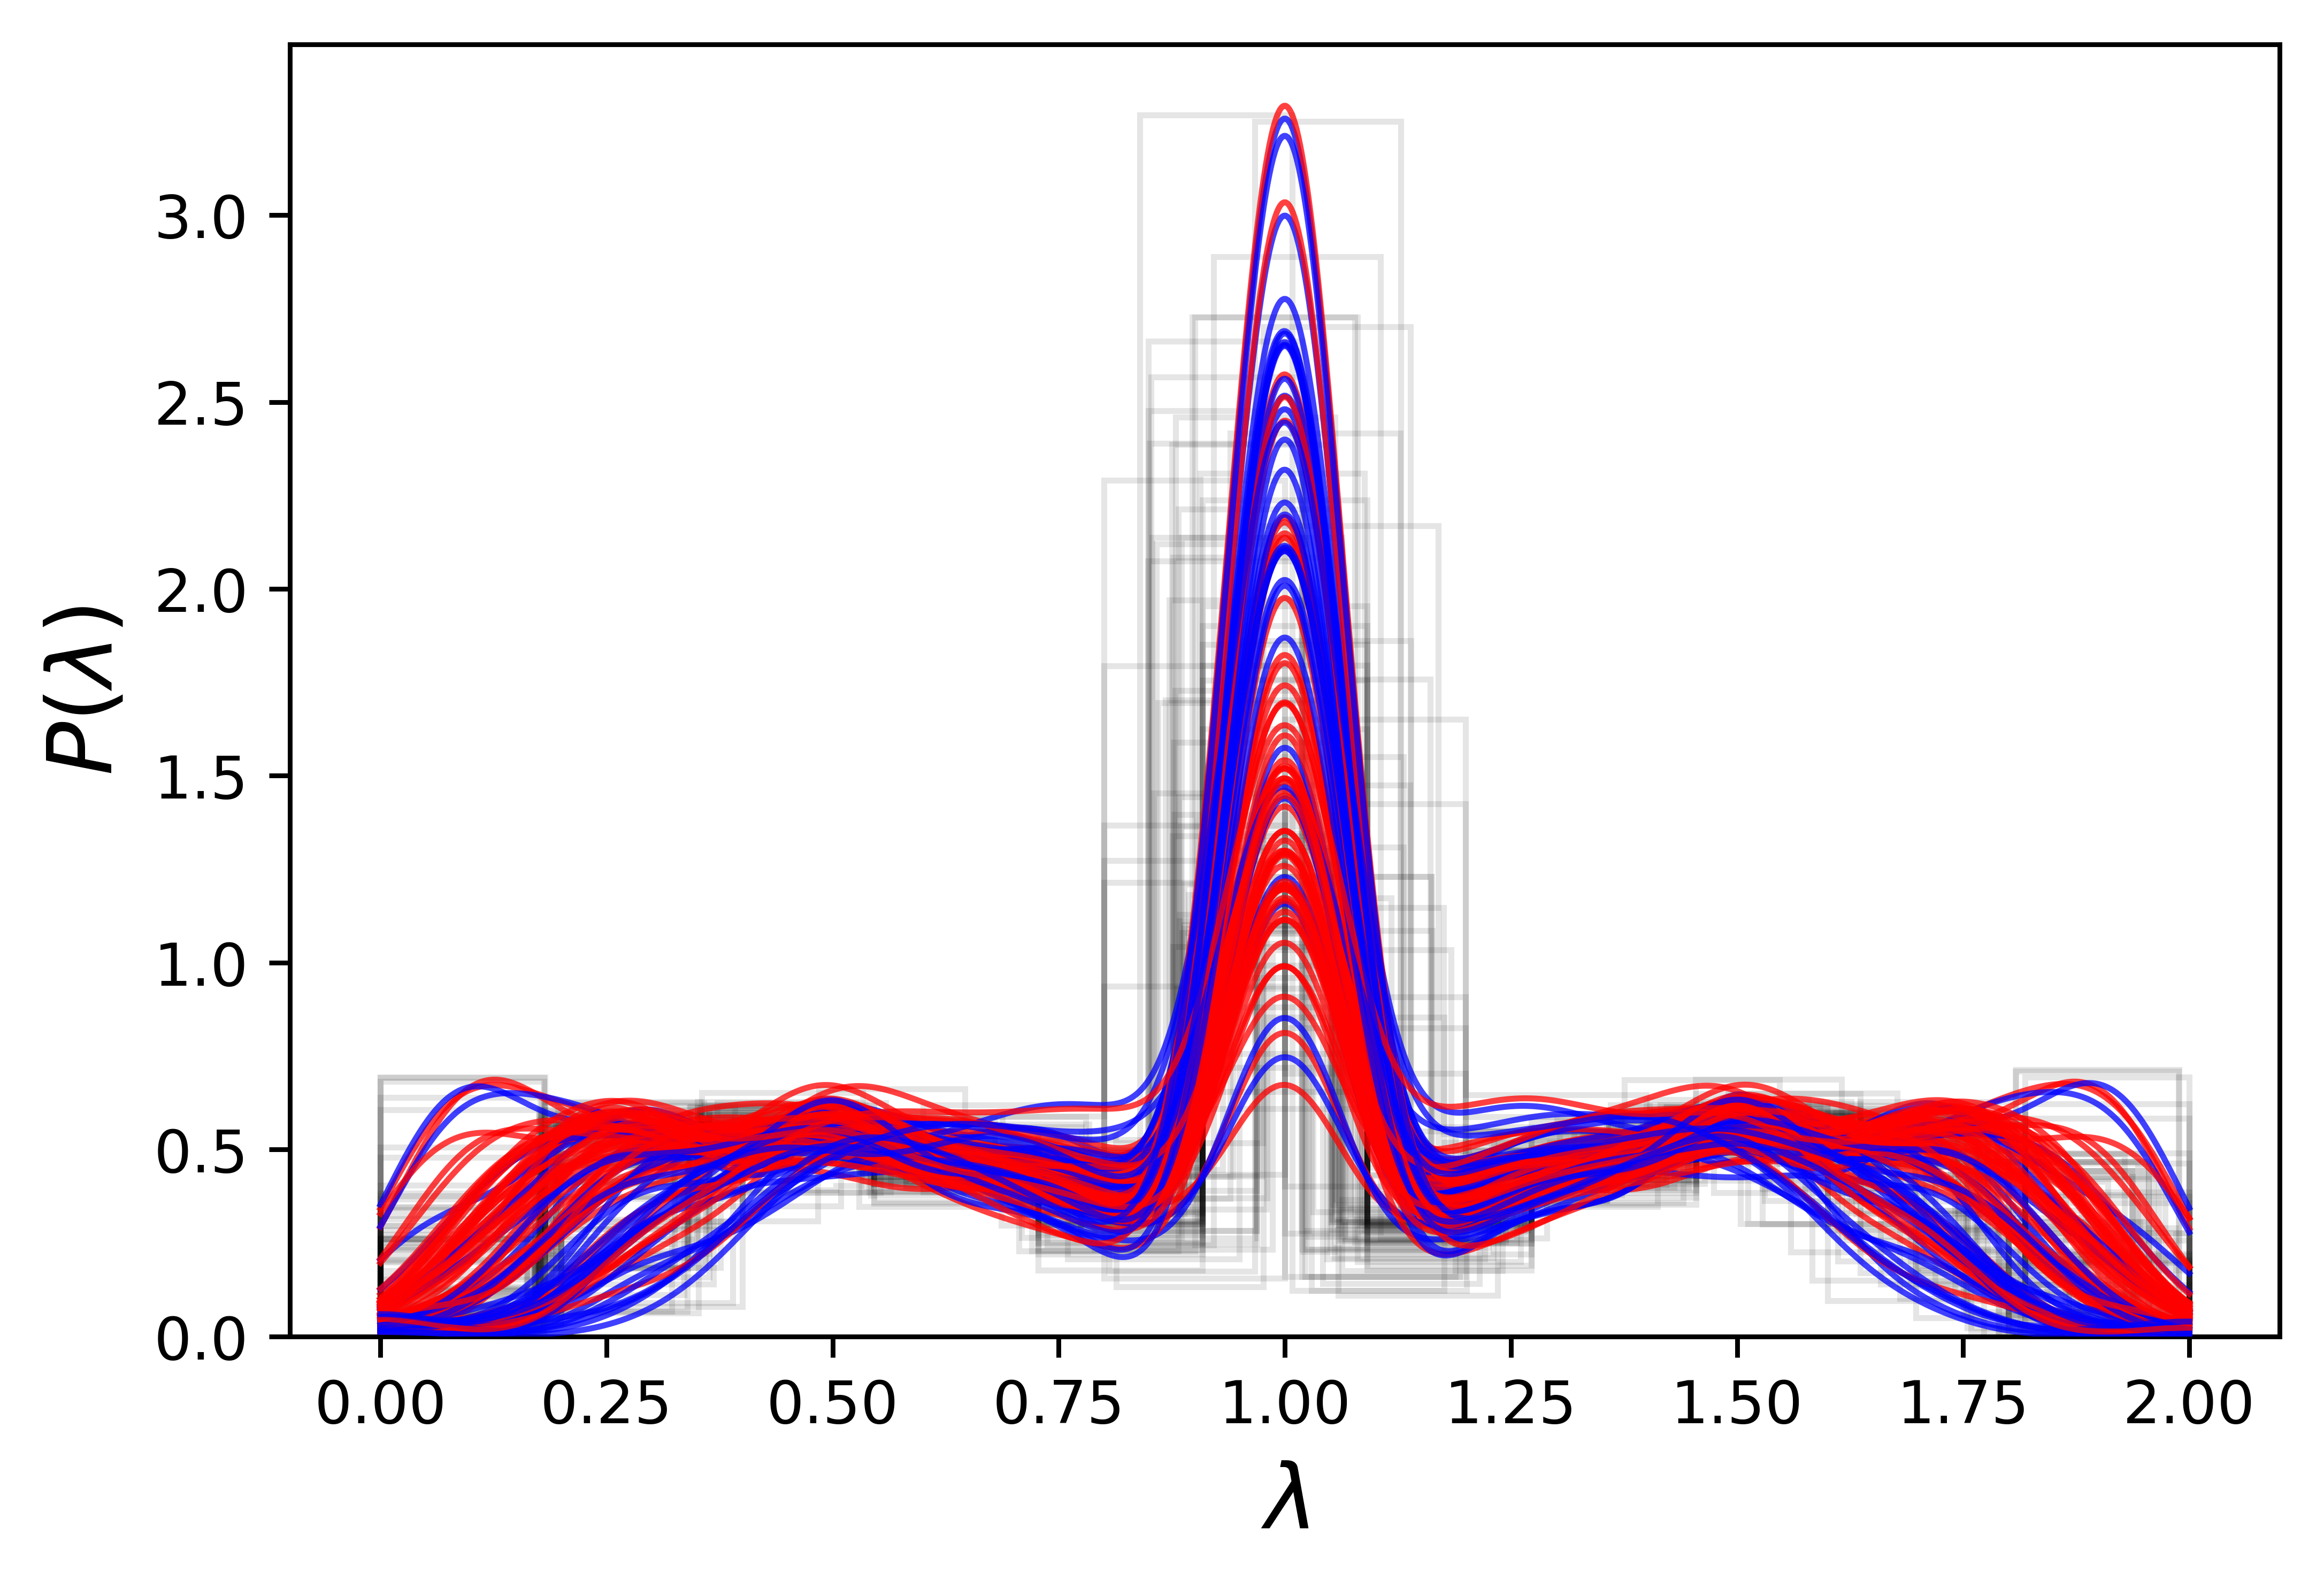

In [130]:
L={}
fig, ax = plt.subplots(dpi=800)

import matplotlib.colors
cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(vmin=min(entropy_languages.values()), vmax=max(entropy_languages.values()))

for language in spectrum_languages.keys():
    data = np.array(spectrum_languages[language])
    plt.hist(data, bins='doane', cumulative=False, alpha=0.1,histtype='step',stacked=False,density=True,
        zorder=5, edgecolor='k')
    kde = sm.nonparametric.KDEUnivariate(data)
    kde.fit(bw=0.065) # Estimate the densities
    X=np.linspace(0, 2, num=1000)
    prediction=[kde.evaluate(x) for x in X]
    L[language]=prediction
    
    ax.plot(X, prediction, '-', lw=1, color=colors[language], alpha=0.75, zorder=10)

#L=[[np.mean(x),np.std(x)] for x in list(zip(*L))]

#plt.plot(X, L, '-', lw=2, alpha=1, color='k', zorder=10, label='average language')

#sma = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sma.set_array([])  # only needed for matplotlib < 3.1
#fig.colorbar(sma)
#cbar.set_label(r'$H$', rotation=270)

#cbar = fig.colorbar(sma)
#cbar.ax.set_ylabel(r'entropy $H$',fontsize=15)

#plt.legend(loc='upper left',fontsize=12)
#plt.xlim([-10,10])
#plt.ylim([0., 3])
plt.xlabel(r'$\lambda$',fontsize=15)
plt.ylabel(r'$P(\lambda)$',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('spectrum.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()